In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('ukrain_war_snscrape_jigme2.csv')

In [ ]:
df.shape

(643556, 16)

In [ ]:
df.head(5)

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place
0,mic_marek,2018-11-10 14:01:32+00:00,12228,830,0,en,2022-11-27 19:20:18+00:00,0,Twitter Web App,1596947040432709633,1/3 The #Russia #propaganda apparatus permanen...,"['Russia', 'propaganda', 'NATO']",1596947040432709633,NaN,NaN,NaN
1,10WallStreet,2012-08-26 19:26:27+00:00,1108,607,1,en,2022-11-27 19:16:01+00:00,1,Twitter for Android,1596945959065645056,"#NATO, #EU &amp; #TheWest Got Itself in a Mess...","['NATO', 'EU', 'TheWest', 'Ukraine', 'BidenFam...",1596719680416268290,https://twitter.com/10WallStreet,NaN,NaN
2,onsaledrones,2020-05-07 19:01:27+00:00,130,9,0,en,2022-11-27 19:15:35+00:00,0,dlvr.it,1596945849929863168,#Russia #RussiaUkraineWar NATO Drones Attempte...,"['Russia', 'RussiaUkraineWar']",1596945849929863168,NaN,NaN,NaN
3,FreeAgentBobby,2020-01-03 05:36:35+00:00,365,33,0,en,2022-11-27 19:15:25+00:00,0,Twitter for iPhone,1596945808619757570,306\n#Allah #ImamMahdi (atf) #Religion #War #M...,"['Allah', 'ImamMahdi', 'Religion', 'War', 'Mil...",1596945808619757570,NaN,NaN,NaN
4,ElayneStainto10,2022-10-12 14:48:36+00:00,25,122,0,en,2022-11-27 19:12:42+00:00,0,Twitter for Android,1596945125149581317,Threaten Against to @wef is dying.\n#Russia no...,['Russia'],1596945125149581317,NaN,NaN,NaN


# Extracing only Tweets from November

In [ ]:
start_date='2022-11-01 00:00:00+00:00'
end_date='2022-11-30 00:00:00+00:00'
df_nov = df[df['Date_Tweet'].between(start_date,end_date)]

In [ ]:
df_nov.head(3)

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place
0,mic_marek,2018-11-10 14:01:32+00:00,12228,830,0,en,2022-11-27 19:20:18+00:00,0,Twitter Web App,1596947040432709633,1/3 The #Russia #propaganda apparatus permanen...,"['Russia', 'propaganda', 'NATO']",1596947040432709633,NaN,NaN,NaN
1,10WallStreet,2012-08-26 19:26:27+00:00,1108,607,1,en,2022-11-27 19:16:01+00:00,1,Twitter for Android,1596945959065645056,"#NATO, #EU &amp; #TheWest Got Itself in a Mess...","['NATO', 'EU', 'TheWest', 'Ukraine', 'BidenFam...",1596719680416268290,https://twitter.com/10WallStreet,NaN,NaN
2,onsaledrones,2020-05-07 19:01:27+00:00,130,9,0,en,2022-11-27 19:15:35+00:00,0,dlvr.it,1596945849929863168,#Russia #RussiaUkraineWar NATO Drones Attempte...,"['Russia', 'RussiaUkraineWar']",1596945849929863168,NaN,NaN,NaN


In [ ]:
print('No of tweets from november :',df_nov.shape[0])

No of tweets from november : 29405


Checking data types

In [ ]:
df_nov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29405 entries, 0 to 29404
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User             29405 non-null  object
 1   Date_Created     29405 non-null  object
 2   Follows_Count    29405 non-null  int64 
 3   Friends_Count    29405 non-null  int64 
 4   Retweet_Count    29405 non-null  int64 
 5   Language         29405 non-null  object
 6   Date_Tweet       29405 non-null  object
 7   Number_of_Likes  29405 non-null  int64 
 8   Source_of_Tweet  29405 non-null  object
 9   Tweet_Id         29405 non-null  int64 
 10  Tweet            29405 non-null  object
 11  Hashtags         29398 non-null  object
 12  Conversation_Id  29405 non-null  int64 
 13  In_reply_To      2760 non-null   object
 14  Coordinates      232 non-null    object
 15  Place            232 non-null    object
dtypes: int64(6), object(10)
memory usage: 3.8+ MB


# Removing duplicate tweets

In [ ]:
df_nov.drop_duplicates(subset=['Tweet_Id'],inplace=True,ignore_index=True) # removing duplicates
print("After removing duplicates:",df_nov.shape)

After removing duplicates: (29405, 16)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


So, no duplicate tweets

# visualise tweet frequency by date

In [ ]:
df_nov['Date_Tweet1']= pd.to_datetime(df_nov.Date_Tweet, format='%Y-%m-%d')

<ipython-input-14-bf14c1cefa71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov['Date_Tweet1']= pd.to_datetime(df_nov.Date_Tweet, format='%Y-%m-%d')


In [ ]:
df_nov.head(3)

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Date_Tweet1
0,mic_marek,2018-11-10 14:01:32+00:00,12228,830,0,en,2022-11-27 19:20:18+00:00,0,Twitter Web App,1596947040432709633,1/3 The #Russia #propaganda apparatus permanen...,"['Russia', 'propaganda', 'NATO']",1596947040432709633,NaN,NaN,NaN,2022-11-27 19:20:18+00:00
1,10WallStreet,2012-08-26 19:26:27+00:00,1108,607,1,en,2022-11-27 19:16:01+00:00,1,Twitter for Android,1596945959065645056,"#NATO, #EU &amp; #TheWest Got Itself in a Mess...","['NATO', 'EU', 'TheWest', 'Ukraine', 'BidenFam...",1596719680416268290,https://twitter.com/10WallStreet,NaN,NaN,2022-11-27 19:16:01+00:00
2,onsaledrones,2020-05-07 19:01:27+00:00,130,9,0,en,2022-11-27 19:15:35+00:00,0,dlvr.it,1596945849929863168,#Russia #RussiaUkraineWar NATO Drones Attempte...,"['Russia', 'RussiaUkraineWar']",1596945849929863168,NaN,NaN,NaN,2022-11-27 19:15:35+00:00


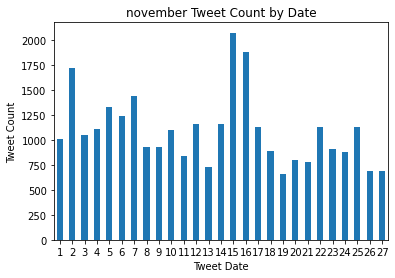

In [ ]:
# get dates from the dataframe 
dates = df_nov["Date_Tweet1"].dt.day
# group tweet timestamps by date and get tweet count for each date
tweetcount_by_date = df_nov["Date_Tweet1"].groupby(dates).size()

# plot bar graph of tweet count by date
tweetcount_by_date.plot.bar();

plt.title("november Tweet Count by Date")
plt.xlabel("Tweet Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.show()

**Why is no of tweets maximum on 15th october, peak on 7, and 2 november?**


# To-Do:Analyse top grams or words on October8, 9 and 10

# NO of languages in data set

In [ ]:
print(f"There are {df_nov['Language'].nunique()} unique languages in this DataFrame.")
print(df_nov["Language"].unique())

There are 56 unique languages in this DataFrame.
['en' 'qht' 'tr' 'fr' 'ca' 'nl' 'ru' 'it' 'hi' 'qme' 'pl' 'und' 'ro' 'da'
 'ja' 'uk' 'mr' 'el' 'de' 'bn' 'in' 'es' 'te' 'no' 'sv' 'kn' 'ko' 'tl'
 'cs' 'pt' 'zh' 'ur' 'vi' 'gu' 'ta' 'ka' 'et' 'hu' 'fa' 'hy' 'ar' 'ml'
 'cy' 'eu' 'th' 'fi' 'lt' 'ne' 'ht' 'pa' 'bg' 'si' 'or' 'sl' 'iw' 'sr']


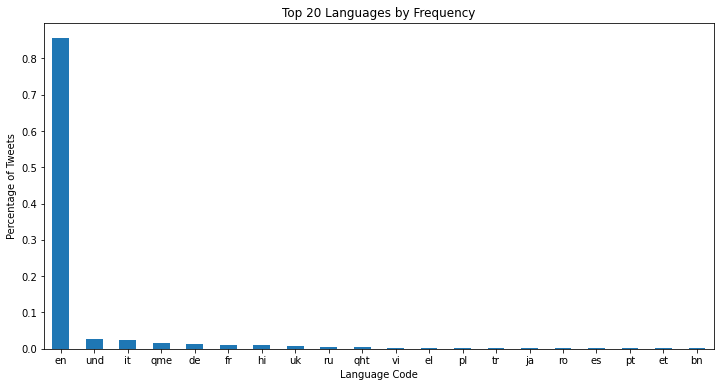

In [ ]:
language_counts = df_nov.groupby("Language").size().sort_values(ascending=False)[0:20]
language_counts=language_counts/len(df_nov)
language_counts.plot.bar(figsize=(12,6),title="Top 20 Languages by Frequency",xlabel="Language Code", ylabel="Percentage of Tweets", rot=90)
plt.xticks(rotation=0)
plt.show()

It can be seen the English is the most prevalant language in this data set by far. Followed by "und".
"und" means twitter could not detect a language.

Let us see rows with "und".

In [ ]:
language_und = df_nov.loc[df_nov["Language"]=="und"]
pd.set_option('display.max_colwidth', None)
language_und["Tweet"]

236                С Днём Морской Пехоты!\n"Black Death", Russian Naval Infantry: The Great Patriotic War (Kola Peninsula, posing with Lend-Lease M1928A1 Thompsons) and currently (Special Military Operation, first one has an AK-12 Model 2020 with a PK-120 sight)\n\n#Russia #RussianArmy https://t.co/5aJycnzCW8
302                                                                                                                                                                                                 #Ukraine️ #UkraineUnderAttack #RussiaInvadedUkraine #russia \n#RussiaIsATerroristState !!! https://t.co/0ywuWfMdtF
308                                         #love despite war !\n-\nMykola waits for his wife Lyudmila coming from #Kyiv with the first train after #Russia's military retreat from #Kherson at the main train station in Kherson, #Ukraine ! Soviet Крыма Rocket Питере сибири #Putin #Moscow https://t.co/DoKerjejFD
321      🇺🇦Jedan od rovova ukrajinskih oružanih snaga kod Bahmuta. 

Thesese tweets appears to be full of ##hashtags. There are also tweets written in Hindi mixed with English.

#A tweet can have 280 characters max. 



The average word in the English language is 4.7 characters. That means a tweet is a word of approx 280/4.7 i.e around 60 words.

Distributuion of Tweets Length

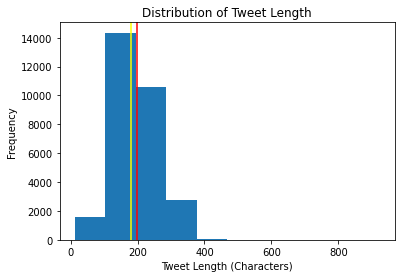

Mean: 198.48352321033838 chars
Median: 181.0 chars
Standard deviation: 67.19210355894465 chars


In [ ]:
tweet_len_series = df_nov["Tweet"].str.len()
tweet_len_series.plot.hist();
plt.title("Distribution of Tweet Length")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
# draw a vertical line for the mean
plt.axvline(x=tweet_len_series.mean(), color="red")
# draw a vertical line for the median
plt.axvline(x=tweet_len_series.median(), color="yellow")
plt.show()

print(f"Mean: {tweet_len_series.mean()} chars")
print(f"Median: {tweet_len_series.median()} chars")
print(f"Standard deviation: {tweet_len_series.std()} chars")

Most Tweets length is between 100 and 300 chars with few outliers with huge lenth of more than 400.

In [ ]:
# get the number of rows missing location info
missing_location_count = df_nov.loc[df_nov["Place"].isna()].shape[0]
print(f"{missing_location_count} rows are missing location information.")
print(f"{round(missing_location_count/df_nov.shape[0]*100,2)}% of the rows are missing location information.")

29173 rows are missing location information.
99.21% of the rows are missing location information.


Since almost all "location" elements are missing. These column is no use for us.

## Hashtag analysis

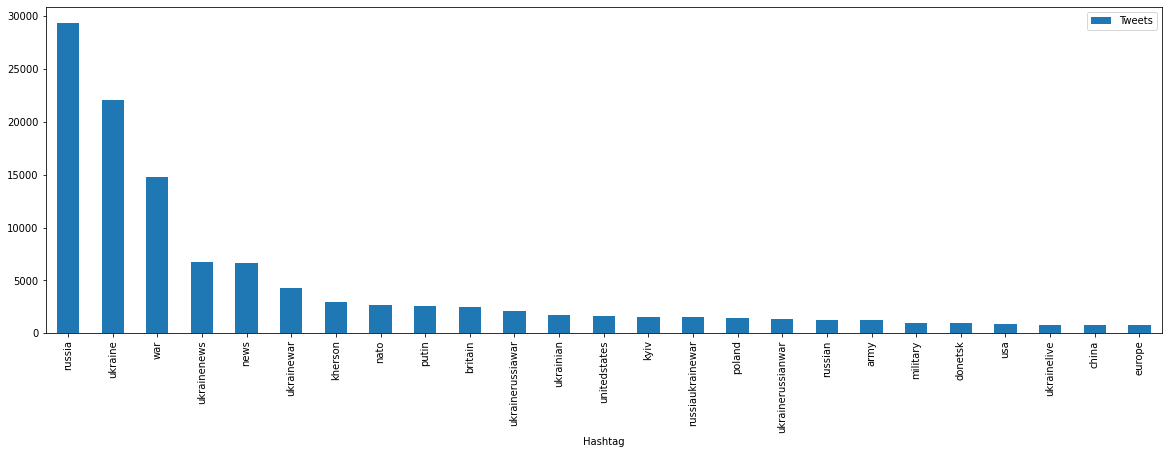

In [ ]:
from collections import Counter
def evaluate_hashtags(x):
    ##function returns list of words from column Hastag##
    hashtags = []
    a = eval(str(x))
    for item in a:
        hashtags.append(item.lower())
        hashtags = list(set(hashtags))   
    return hashtags

hash=df_nov[["Hashtags"]].dropna() ## creating dataframe without null value in Hashtag column

hashtagsListCollection = hash["Hashtags"].apply(evaluate_hashtags)
masterlist = []
for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        masterlist.append(hashtag)
topXItem = 25

x = Counter(masterlist)
topXItemList = x.most_common(topXItem)

df_hash = pd.DataFrame(topXItemList)
df_hash.columns =['Hashtag','Tweets']
dfpivot = df_hash.T
new_header = dfpivot.iloc[0]
dfpivot = dfpivot[1:]
dfpivot.columns = new_header 
plt.rcParams["figure.figsize"] = [20, 6]
df_hash.plot.bar(x='Hashtag', y='Tweets', rot=90)
plt.show()




**Kherson** is a port city of Ukraine that serves as the administrative centre of Kherson Oblast. Located on the Black Sea and on the Dnieper River

Find what happened in Kherson and Donetsk?? Why was it trending??

# Preprocessing Text Data

As we know, tweets can contain lot of micelleneous information apart from text such as URLs and Symbols that should be removed. Upper case and Lower case are unified into Lower case . Mentions and hashtags are removed. Though emojis can be useful for sentiment but we will remove them here for simplicity. We will also remove punctuation and numbers from the tweets.

Finalyy tweets are stemmed into its root word using Lemmatization.

## check whether there are any missing Tweets


In [ ]:
df_nov['Tweet'].isna().any()

False

##1. convert everything to Lower Case 

In [ ]:
df_nov['lower']=df_nov['Tweet'].str.lower()

<ipython-input-27-18e880bdae5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov['lower']=df_nov['Tweet'].str.lower()


## 2. HTML, Hashtags, Mentions, Digits, and Emojis

In [ ]:
!pip install tweet-preprocessor
import preprocessor as p

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def remove_unnecessary(text):
    # INPUT: string (tweet)
    # OUTPUT: string without URLs, mentions, hashtags, digist, and emojis (and smileys)
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG, p.OPT.NUMBER, p.OPT.EMOJI, p.OPT.SMILEY)
    result = p.clean(text)
    return result

In [ ]:
df_nov["cleaned_text"] = df_nov['lower'].map(remove_unnecessary)
df_nov["cleaned_text"].head(4)

<ipython-input-30-fba750575d6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov["cleaned_text"] = df_nov['lower'].map(remove_unnecessary)


0    /3 the apparatus permanently creates materials relating to the issue of "western mercenaries" fighting in ukraine. by repeating these messages, the kremlin is creating a war in ukraine into an armed conflict "between russia and ".
1                                                                                                                                         , &amp; got itself in a mess in it can't get out of. all thanks to &amp; pentagon lost war lobby.
2                                                                                                                                                        nato drones attempted to cross russian border before war, governor says - newsweek
3                                                                                                      (atf) this is how you shouldve photoshopped moron lmao . prepare for anger of allah swt, i will be sure to share it when it happens.
Name: cleaned_text, dtype: object

## 3. Remove HTML entities

The most common ones are "&amp" and "\n". We will replace these with empty string.

In [ ]:
df_nov['cleaned_text']=df_nov['cleaned_text'].str.replace("&amp","")

<ipython-input-32-5aa2ec280be6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov['cleaned_text']=df_nov['cleaned_text'].str.replace("&amp","")


## 5.Remove Stop words

In [ ]:
# import nltk package to find stopwords
import nltk
from nltk.corpus import stopwords  
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df_nov['cleaned_text'] = df_nov['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-33-9be444fde559>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov['cleaned_text'] = df_nov['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


## 4. Remove Punctuations

In [ ]:
df_nov['cleaned_text']

0        /3 apparatus permanently creates materials relating issue "western mercenaries" fighting ukraine. repeating messages, kremlin creating war ukraine armed conflict "between russia ".
1                                                                                                                                , ; got mess can't get of. thanks ; pentagon lost war lobby.
2                                                                                                                    nato drones attempted cross russian border war, governor says - newsweek
3                                                                                                       (atf) shouldve photoshopped moron lmao . prepare anger allah swt, sure share happens.
4                                                                                                                                                         threaten dying. goes war wef dying.
                                                  

In [ ]:
# using the 're.sub' to remove punctuation.
import re
def remove_punctuation(text):
    text = re.sub(r"[^\w\s]", "", text)
    return text
df_nov["cleaned_text"] = df_nov["cleaned_text"].apply(remove_punctuation)

<ipython-input-35-61cd2ef45f26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov["cleaned_text"] = df_nov["cleaned_text"].apply(remove_punctuation)


In [ ]:
df_nov["cleaned_text"]

0        3 apparatus permanently creates materials relating issue western mercenaries fighting ukraine repeating messages kremlin creating war ukraine armed conflict between russia 
1                                                                                                                                got mess cant get of thanks  pentagon lost war lobby
2                                                                                                              nato drones attempted cross russian border war governor says  newsweek
3                                                                                                    atf shouldve photoshopped moron lmao  prepare anger allah swt sure share happens
4                                                                                                                                                   threaten dying goes war wef dying
                                                                                          

## 5. Stemming with Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def stemming(text):
  return  wnl.lemmatize(text)
df_nov['cleaned_text']= df_nov['cleaned_text'].apply(lambda x: stemming(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-38-4f70bccf50ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov['cleaned_text']= df_nov['cleaned_text'].apply(lambda x: stemming(x))


In [ ]:
df_nov['cleaned_text']

0        3 apparatus permanently creates materials relating issue western mercenaries fighting ukraine repeating messages kremlin creating war ukraine armed conflict between russia 
1                                                                                                                                got mess cant get of thanks  pentagon lost war lobby
2                                                                                                              nato drones attempted cross russian border war governor says  newsweek
3                                                                                                    atf shouldve photoshopped moron lmao  prepare anger allah swt sure share happens
4                                                                                                                                                   threaten dying goes war wef dying
                                                                                          

## word cloud visualisation before Sentiment Analysis



In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

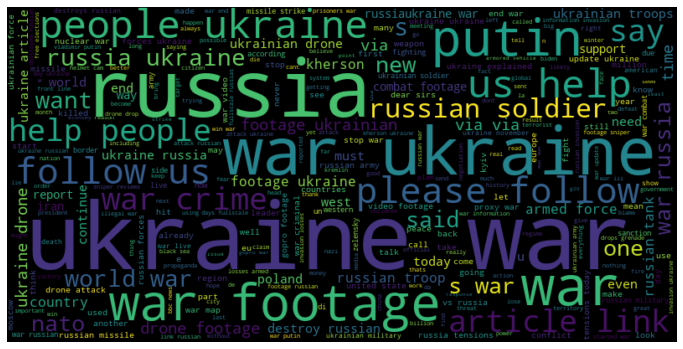

In [ ]:
# concatenate all tweets in cleaned_text column into one long string for wordcloud to accept
text = " ".join(tweet for tweet in df_nov["cleaned_text"])
wc = WordCloud(width=800, height=400, max_words=300).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## word cloud visualisation before Sentiment Analysis of 14th-16th November 2022

In [ ]:
start_date='2022-11-14 00:00:00+00:00'
end_date='2022-11-16 00:00:00+00:00'
df_imp = df_nov[df_nov['Date_Tweet'].between(start_date,end_date)]

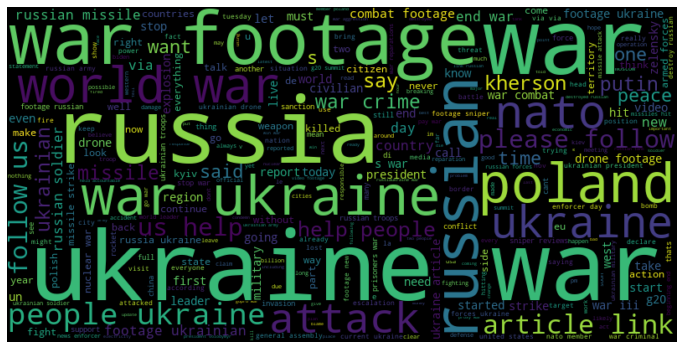

In [ ]:
# concatenate all tweets in cleaned_text column into one long string for wordcloud to accept
text = " ".join(tweet for tweet in df_imp["cleaned_text"])
wc = WordCloud(width=800, height=400, max_words=300).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Visualising top n-grams from  Month of November

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
import seaborn as sns

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

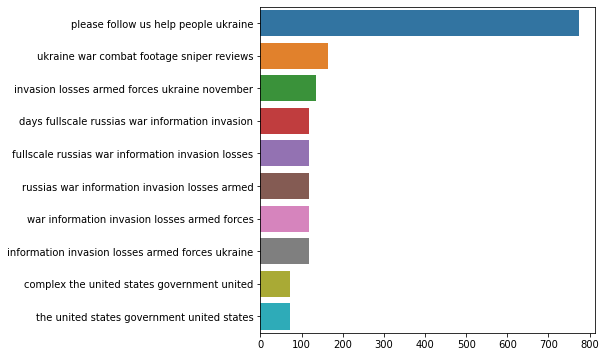

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(6.0,6.0)  

# lets take a look at 6 letters most common in tweets
plot_top_ngrams_barchart(df_nov['cleaned_text'],6)

## Visualising top n grams from 14th-16th November

In [ ]:
start_date='2022-11-14 00:00:00+00:00'
end_date='2022-11-17 00:00:00+00:00'
df_imp = df_nov[df_nov['Date_Tweet'].between(start_date,end_date)]

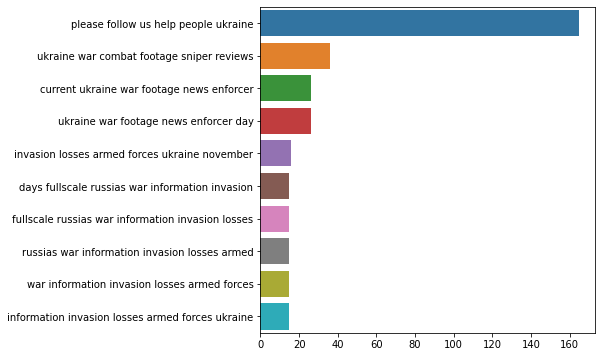

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(6.0,6.0)  

# lets take a look at 6 letters most common in tweets
plot_top_ngrams_barchart(df_imp['cleaned_text'],6)

Find the most discussed topics during these days:

1.

2.

3.

## visualise tweets that received most retweets


# Sentiment Prediction 

Sentiment is predicted based on majority votings from 3 models
1. textblob
2. best trained model from part 1 of the project XGB
3. vaeder

## 1.Vader Sentiment Analyzer

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    #print("Overall sentiment dictionary is : ", sentiment_dict)
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    #print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "POSITIVE"
 
    elif sentiment_dict['compound'] <= - 0.05 :
        return "NEGATIVE"
 
    else :
        return "NEUTRAL"


In [ ]:
df_nov['vader']=df_nov['Tweet'].apply(sentiment_scores)

<ipython-input-52-0e274645955b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov['vader']=df_nov['Tweet'].apply(sentiment_scores)


In [ ]:
df_nov

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,vader
0,mic_marek,2018-11-10 14:01:32+00:00,12228,830,0,en,2022-11-27 19:20:18+00:00,0,Twitter Web App,1596947040432709633,"1/3 The #Russia #propaganda apparatus permanently creates materials relating to the issue of ""Western mercenaries"" fighting in Ukraine. By repeating these messages, the Kremlin is creating a war in Ukraine into an armed conflict ""between Russia and #NATO"". https://t.co/3zE5uEMjnP","['Russia', 'propaganda', 'NATO']",1596947040432709633,NaN,NaN,NaN,2022-11-27 19:20:18+00:00,"1/3 the #russia #propaganda apparatus permanently creates materials relating to the issue of ""western mercenaries"" fighting in ukraine. by repeating these messages, the kremlin is creating a war in ukraine into an armed conflict ""between russia and #nato"". https://t.co/3ze5uemjnp",3 apparatus permanently creates materials relating issue western mercenaries fighting ukraine repeating messages kremlin creating war ukraine armed conflict between russia,NEGATIVE
1,10WallStreet,2012-08-26 19:26:27+00:00,1108,607,1,en,2022-11-27 19:16:01+00:00,1,Twitter for Android,1596945959065645056,"#NATO, #EU &amp; #TheWest Got Itself in a Mess in #Ukraine It Can't Get Out Of. All Thanks to #BidenFamliy &amp; Pentagon Lost War Lobby. #nytimes #wapo #huffpost #politico #bbc #msnbc #foxnews #azov #kiev #russia #germany #Zelensky #nbc #npr #aarp #biden #gop #putin #donbass #drudge #g7","['NATO', 'EU', 'TheWest', 'Ukraine', 'BidenFamliy', 'nytimes', 'wapo', 'huffpost', 'politico', 'bbc', 'msnbc', 'foxnews', 'azov', 'kiev', 'russia', 'germany', 'Zelensky', 'nbc', 'npr', 'aarp', 'biden', 'gop', 'putin', 'donbass', 'drudge', 'g7']",1596719680416268290,https://twitter.com/10WallStreet,NaN,NaN,2022-11-27 19:16:01+00:00,"#nato, #eu &amp; #thewest got itself in a mess in #ukraine it can't get out of. all thanks to #bidenfamliy &amp; pentagon lost war lobby. #nytimes #wapo #huffpost #politico #bbc #msnbc #foxnews #azov #kiev #russia #germany #zelensky #nbc #npr #aarp #biden #gop #putin #donbass #drudge #g7",got mess cant get of thanks pentagon lost war lobby,NEGATIVE
2,onsaledrones,2020-05-07 19:01:27+00:00,130,9,0,en,2022-11-27 19:15:35+00:00,0,dlvr.it,1596945849929863168,"#Russia #RussiaUkraineWar NATO Drones Attempted to Cross Russian Border Before War, Governor Says - Newsweek https://t.co/PgOdcos2nw","['Russia', 'RussiaUkraineWar']",1596945849929863168,NaN,NaN,NaN,2022-11-27 19:15:35+00:00,"#russia #russiaukrainewar nato drones attempted to cross russian border before war, governor says - newsweek https://t.co/pgodcos2nw",nato drones attempted cross russian border war governor says newsweek,NEGATIVE
3,FreeAgentBobby,2020-01-03 05:36:35+00:00,365,33,0,en,2022-11-27 19:15:25+00:00,0,Twitter for iPhone,1596945808619757570,"306\n#Allah #ImamMahdi (atf) #Religion #War #Military #World #Ukraine #Russia #WW3 #RussiaUkraineWar #Trending #Intelligence #Oplran\n\nThis is how you should’ve photoshopped moron @USMNT lmao #ExpellUSA. Prepare for Anger of Allah swt, I will be sure to share it when it happens. 😎 https://t.co/6E7ZE4BF8X","['Allah', 'ImamMahdi', 'Religion', 'War', 'Military', 'World', 'Ukraine', 'Russia', 'WW3', 'RussiaUkraineWar', 'Trending', 'Intelligence', 'Oplran', 'ExpellUSA']",1596945808619757570,NaN,NaN,NaN,2022-11-27 19:15:25+00:00,"306\n#allah #imammahdi (atf) #religion #war #military #world #ukraine #russia #ww3 #russiaukrainewar #trending #intelligence #oplran\n\nthis is how you should’ve photoshopped moron @usmnt lmao #expellusa. prepare for anger of allah swt, i will be sure to share it when it happens. 😎 https://t.co/6e7ze4bf8x",atf shouldve photoshopped moron lmao prepare anger allah swt sure share happens,POSITIVE
4,ElayneStainto10,2022-10-12 14:48:36+00:00,25,122,0,en,2022-11-27 19:12:42+00:00,0,Twitter for Android,159694512514

In [ ]:
df_nov.to_csv("vader" + "_" + "nov" + "_" + "result" + ".csv", index=False)

## 2.Sentiment with text Blob

In [ ]:
from textblob import TextBlob

In [ ]:
# create a funciton to get the polarity
def polarity(text):
  score=TextBlob(text).sentiment.polarity
  if score <0:
    return 'NEGATIVE'
  elif score == 0:
    return 'NEUTRAL'
  else:
    return 'POSITIVE'


In [ ]:
df_nov['textblob'] = df_nov['Tweet'].apply(polarity)

<ipython-input-57-53cb783fa7eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov['textblob'] = df_nov['Tweet'].apply(polarity)


In [ ]:
df_nov

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,vader,textblob
0,mic_marek,2018-11-10 14:01:32+00:00,12228,830,0,en,2022-11-27 19:20:18+00:00,0,Twitter Web App,1596947040432709633,...,"['Russia', 'propaganda', 'NATO']",1596947040432709633,NaN,NaN,NaN,2022-11-27 19:20:18+00:00,"1/3 the #russia #propaganda apparatus permanently creates materials relating to the issue of ""western mercenaries"" fighting in ukraine. by repeating these messages, the kremlin is creating a war in ukraine into an armed conflict ""between russia and #nato"". https://t.co/3ze5uemjnp",3 apparatus permanently creates materials relating issue western mercenaries fighting ukraine repeating messages kremlin creating war ukraine armed conflict between russia,NEGATIVE,NEGATIVE
1,10WallStreet,2012-08-26 19:26:27+00:00,1108,607,1,en,2022-11-27 19:16:01+00:00,1,Twitter for Android,1596945959065645056,...,"['NATO', 'EU', 'TheWest', 'Ukraine', 'BidenFamliy', 'nytimes', 'wapo', 'huffpost', 'politico', 'bbc', 'msnbc', 'foxnews', 'azov', 'kiev', 'russia', 'germany', 'Zelensky', 'nbc', 'npr', 'aarp', 'biden', 'gop', 'putin', 'donbass', 'drudge', 'g7']",1596719680416268290,https://twitter.com/10WallStreet,NaN,NaN,2022-11-27 19:16:01+00:00,"#nato, #eu &amp; #thewest got itself in a mess in #ukraine it can't get out of. all thanks to #bidenfamliy &amp; pentagon lost war lobby. #nytimes #wapo #huffpost #politico #bbc #msnbc #foxnews #azov #kiev #russia #germany #zelensky #nbc #npr #aarp #biden #gop #putin #donbass #drudge #g7",got mess cant get of thanks pentagon lost war lobby,NEGATIVE,POSITIVE
2,onsaledrones,2020-05-07 19:01:27+00:00,130,9,0,en,2022-11-27 19:15:35+00:00,0,dlvr.it,1596945849929863168,...,"['Russia', 'RussiaUkraineWar']",1596945849929863168,NaN,NaN,NaN,2022-11-27 19:15:35+00:00,"#russia #russiaukrainewar nato drones attempted to cross russian border before war, governor says - newsweek https://t.co/pgodcos2nw",nato drones attempted cross russian border war governor says newsweek,NEGATIVE,NEUTRAL
3,FreeAgentBobby,2020-01-03 05:36:35+00:00,365,33,0,en,2022-11-27 19:15:25+00:00,0,Twitter for iPhone,1596945808619757570,...,"['Allah', 'ImamMahdi', 'Religion', 'War', 'Military', 'World', 'Ukraine', 'Russia', 'WW3', 'RussiaUkraineWar', 'Trending', 'Intelligence', 'Oplran', 'ExpellUSA']",1596945808619757570,NaN,NaN,NaN,2022-11-27 19:15:25+00:00,"306\n#allah #imammahdi (atf) #religion #war #military #world #ukraine #russia #ww3 #russiaukrainewar #trending #intelligence #oplran\n\nthis is how you should’ve photoshopped moron @usmnt lmao #expellusa. prepare for anger of allah swt, i will be sure to share it when it happens. 😎 https://t.co/6e7ze4bf8x",atf shouldve photoshopped moron lmao prepare anger allah swt sure share happens,POSITIVE,NEGATIVE
4,ElayneStainto10,2022-10-12 14:48:36+00:00,25,122,0,en,2022-11-27 19:12:42+00:00,0,Twitter for Android,1596945125149581317,...,['Russia'],1596945125149581317,NaN,NaN,NaN,2022-11-27 19:12:42+00:00,threaten against to @wef is dying.\n#russia now goes to the war against from wef is dying.,threaten dying goes war wef dying,NEGATIVE,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29400,MSirani,2018-07-02 08:41:51+00:00,20,6,0,en,2022-11-01 00:11:45+00:00,0,Twitter Web App,1587235913184206848,...,"['asylum', 'refugees', 'EU', 'Russia', 'Ukraine', 'MOLDOVA', 'Turkey', 'Greece', 'Cyprus']",1587235913184206848,NaN,NaN,NaN,2022-11-01 00:11:45+00:00,"1-2) do you want to reduce the influx of #asylum seekers and #refugees towards the #eu? i mention 2 urgent tasks, not more: a- don't let #russia- #ukraine war overspil into #moldova. b- deescalate the tension between #turkey, #greece and #cyprus. i leave aside hotspots in africa.",2 want reduce influx seekers towards mention urgent tasks more a let war overspil b deescalate tensio

In [ ]:
df_nov.to_csv("vader_textblob" + "_" + "nov" + "_" + "result" + ".csv", index=False)

## 3.XG boosting

In [ ]:
df_nov=pd.read_csv('/content/vader_textblob_xgb_nov_result.csv')

In [ ]:
df_nov

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,Conversation_Id,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,vader,textblob,xgb
0,mic_marek,2018-11-10 14:01:32+00:00,12228,830,0,en,2022-11-27 19:20:18+00:00,0,Twitter Web App,1596947040432709633,...,1596947040432709633,NaN,NaN,NaN,2022-11-27 19:20:18+00:00,"1/3 the #russia #propaganda apparatus permanently creates materials relating to the issue of ""western mercenaries"" fighting in ukraine. by repeating these messages, the kremlin is creating a war in ukraine into an armed conflict ""between russia and #nato"". https://t.co/3ze5uemjnp",3 apparatus permanently creates materials relating issue western mercenaries fighting ukraine repeating messages kremlin creating war ukraine armed conflict between russia,NEGATIVE,NEGATIVE,0
1,10WallStreet,2012-08-26 19:26:27+00:00,1108,607,1,en,2022-11-27 19:16:01+00:00,1,Twitter for Android,1596945959065645056,...,1596719680416268290,https://twitter.com/10WallStreet,NaN,NaN,2022-11-27 19:16:01+00:00,"#nato, #eu &amp; #thewest got itself in a mess in #ukraine it can't get out of. all thanks to #bidenfamliy &amp; pentagon lost war lobby. #nytimes #wapo #huffpost #politico #bbc #msnbc #foxnews #azov #kiev #russia #germany #zelensky #nbc #npr #aarp #biden #gop #putin #donbass #drudge #g7",got mess cant get of thanks pentagon lost war lobby,NEGATIVE,POSITIVE,0
2,onsaledrones,2020-05-07 19:01:27+00:00,130,9,0,en,2022-11-27 19:15:35+00:00,0,dlvr.it,1596945849929863168,...,1596945849929863168,NaN,NaN,NaN,2022-11-27 19:15:35+00:00,"#russia #russiaukrainewar nato drones attempted to cross russian border before war, governor says - newsweek https://t.co/pgodcos2nw",nato drones attempted cross russian border war governor says newsweek,NEGATIVE,NEUTRAL,0
3,FreeAgentBobby,2020-01-03 05:36:35+00:00,365,33,0,en,2022-11-27 19:15:25+00:00,0,Twitter for iPhone,1596945808619757570,...,1596945808619757570,NaN,NaN,NaN,2022-11-27 19:15:25+00:00,"306\n#allah #imammahdi (atf) #religion #war #military #world #ukraine #russia #ww3 #russiaukrainewar #trending #intelligence #oplran\n\nthis is how you should’ve photoshopped moron @usmnt lmao #expellusa. prepare for anger of allah swt, i will be sure to share it when it happens. 😎 https://t.co/6e7ze4bf8x",atf shouldve photoshopped moron lmao prepare anger allah swt sure share happens,POSITIVE,NEGATIVE,0
4,ElayneStainto10,2022-10-12 14:48:36+00:00,25,122,0,en,2022-11-27 19:12:42+00:00,0,Twitter for Android,1596945125149581317,...,1596945125149581317,NaN,NaN,NaN,2022-11-27 19:12:42+00:00,threaten against to @wef is dying.\n#russia now goes to the war against from wef is dying.,threaten dying goes war wef dying,NEGATIVE,NEUTRAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28570,dizzytaylor,2009-03-31 21:14:56+00:00,1315,2668,0,en,2022-11-01 00:15:48+00:00,0,Twitter for iPhone,1587236932102541312,...,1587236932102541312,NaN,NaN,NaN,2022-11-01 00:15:48+00:00,"did people really think that after a worldwide #pandemic, an unprovoked war by #russia &amp; #corporategreed, that there’d be no economic ramifications?",people really think worldwide unprovoked war thered economic ramifications,NEGATIVE,POSITIVE,0
28571,MSirani,2018-07-02 08:41:51+00:00,20,6,0,en,2022-11-01 00:11:45+00:00,0,Twitter Web App,1587235913184206848,...,1587235913184206848,NaN,NaN,NaN,2022-11-01 00:11:45+00:00,"1-2) do you want to reduce the influx of #asylum seekers and #refugees towards the #eu? i mention 2 urgent tasks, not more: a- don't let #russia- #ukraine war overspil into #moldova. b- deescalate the tension between #turkey, #greece and #cyprus. i leave aside hotspots in africa.",2 want reduce influx seekers towards mention urgent tasks more a let war overspil b deescalate tension leave aside hotspots africa,NEGATIVE,NEGATIVE,0
28572,Silvio_Menezs,2009-09-11 23:41:10+00:00,1303,3411,1,en,2022-11-01 00:07:33+00:00,9,T

mapping xgb predictions:

0 - negative 
1- positive

In [ ]:
dict_map={0:'NEGATIVE', 1:'POSITIVE'}
df_nov['xgb']=df_nov['xgb'].map(dict_map)

In [ ]:
df_nov

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,Conversation_Id,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,vader,textblob,xgb
0,mic_marek,2018-11-10 14:01:32+00:00,12228,830,0,en,2022-11-27 19:20:18+00:00,0,Twitter Web App,1596947040432709633,...,1596947040432709633,NaN,NaN,NaN,2022-11-27 19:20:18+00:00,"1/3 the #russia #propaganda apparatus permanently creates materials relating to the issue of ""western mercenaries"" fighting in ukraine. by repeating these messages, the kremlin is creating a war in ukraine into an armed conflict ""between russia and #nato"". https://t.co/3ze5uemjnp",3 apparatus permanently creates materials relating issue western mercenaries fighting ukraine repeating messages kremlin creating war ukraine armed conflict between russia,NEGATIVE,NEGATIVE,NEGATIVE
1,10WallStreet,2012-08-26 19:26:27+00:00,1108,607,1,en,2022-11-27 19:16:01+00:00,1,Twitter for Android,1596945959065645056,...,1596719680416268290,https://twitter.com/10WallStreet,NaN,NaN,2022-11-27 19:16:01+00:00,"#nato, #eu &amp; #thewest got itself in a mess in #ukraine it can't get out of. all thanks to #bidenfamliy &amp; pentagon lost war lobby. #nytimes #wapo #huffpost #politico #bbc #msnbc #foxnews #azov #kiev #russia #germany #zelensky #nbc #npr #aarp #biden #gop #putin #donbass #drudge #g7",got mess cant get of thanks pentagon lost war lobby,NEGATIVE,POSITIVE,NEGATIVE
2,onsaledrones,2020-05-07 19:01:27+00:00,130,9,0,en,2022-11-27 19:15:35+00:00,0,dlvr.it,1596945849929863168,...,1596945849929863168,NaN,NaN,NaN,2022-11-27 19:15:35+00:00,"#russia #russiaukrainewar nato drones attempted to cross russian border before war, governor says - newsweek https://t.co/pgodcos2nw",nato drones attempted cross russian border war governor says newsweek,NEGATIVE,NEUTRAL,NEGATIVE
3,FreeAgentBobby,2020-01-03 05:36:35+00:00,365,33,0,en,2022-11-27 19:15:25+00:00,0,Twitter for iPhone,1596945808619757570,...,1596945808619757570,NaN,NaN,NaN,2022-11-27 19:15:25+00:00,"306\n#allah #imammahdi (atf) #religion #war #military #world #ukraine #russia #ww3 #russiaukrainewar #trending #intelligence #oplran\n\nthis is how you should’ve photoshopped moron @usmnt lmao #expellusa. prepare for anger of allah swt, i will be sure to share it when it happens. 😎 https://t.co/6e7ze4bf8x",atf shouldve photoshopped moron lmao prepare anger allah swt sure share happens,POSITIVE,NEGATIVE,NEGATIVE
4,ElayneStainto10,2022-10-12 14:48:36+00:00,25,122,0,en,2022-11-27 19:12:42+00:00,0,Twitter for Android,1596945125149581317,...,1596945125149581317,NaN,NaN,NaN,2022-11-27 19:12:42+00:00,threaten against to @wef is dying.\n#russia now goes to the war against from wef is dying.,threaten dying goes war wef dying,NEGATIVE,NEUTRAL,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28570,dizzytaylor,2009-03-31 21:14:56+00:00,1315,2668,0,en,2022-11-01 00:15:48+00:00,0,Twitter for iPhone,1587236932102541312,...,1587236932102541312,NaN,NaN,NaN,2022-11-01 00:15:48+00:00,"did people really think that after a worldwide #pandemic, an unprovoked war by #russia &amp; #corporategreed, that there’d be no economic ramifications?",people really think worldwide unprovoked war thered economic ramifications,NEGATIVE,POSITIVE,NEGATIVE
28571,MSirani,2018-07-02 08:41:51+00:00,20,6,0,en,2022-11-01 00:11:45+00:00,0,Twitter Web App,1587235913184206848,...,1587235913184206848,NaN,NaN,NaN,2022-11-01 00:11:45+00:00,"1-2) do you want to reduce the influx of #asylum seekers and #refugees towards the #eu? i mention 2 urgent tasks, not more: a- don't let #russia- #ukraine war overspil into #moldova. b- deescalate the tension between #turkey, #greece and #cyprus. i leave aside hotspots in africa.",2 want reduce influx seekers towards mention urgent tasks more a let war overspil b deescalate tension leave aside hotspots africa,NEGATIVE,NEGATIVE,NEGATIVE
28572,Silvio_Menezs,2009-09-11 23:41:10+0

## 4.Majority Voting

Function that does the majority voting: Models used are AWS, TEXTBLOB and self trained XGB 

0- negative 

1- neutral

2- positive

In [ ]:
def majority_voting(df_temp,column=['vader','textblob','xgb']):
  label=[]
  for i in range(0,df_temp.shape[0]):
    Label_list=[df_temp['vader'][i],df_temp['textblob'][i],df_temp['xgb'][i]]
    list_count=[0,0,0]
    for j,item in enumerate(Label_list):
      if item=='NEGATIVE':
        list_count[0]=list_count[0]+1
      elif item=='NEUTRAL':
        list_count[1]=list_count[1]+1
      else:
        list_count[2]=list_count[2]+1
    if (list_count[0] ==list_count[1]) & (list_count[1]==list_count[2]):
      label.append(1)
    else:
      label.append(list_count.index(max(list_count)))
  return label

In [ ]:
label=majority_voting(df_nov)

In [ ]:
df_nov['Majority_label']=label

In [ ]:
df_nov

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,vader,textblob,xgb,Majority_label
0,mic_marek,2018-11-10 14:01:32+00:00,12228,830,0,en,2022-11-27 19:20:18+00:00,0,Twitter Web App,1596947040432709633,...,NaN,NaN,NaN,2022-11-27 19:20:18+00:00,"1/3 the #russia #propaganda apparatus permanently creates materials relating to the issue of ""western mercenaries"" fighting in ukraine. by repeating these messages, the kremlin is creating a war in ukraine into an armed conflict ""between russia and #nato"". https://t.co/3ze5uemjnp",3 apparatus permanently creates materials relating issue western mercenaries fighting ukraine repeating messages kremlin creating war ukraine armed conflict between russia,NEGATIVE,NEGATIVE,NEGATIVE,0
1,10WallStreet,2012-08-26 19:26:27+00:00,1108,607,1,en,2022-11-27 19:16:01+00:00,1,Twitter for Android,1596945959065645056,...,https://twitter.com/10WallStreet,NaN,NaN,2022-11-27 19:16:01+00:00,"#nato, #eu &amp; #thewest got itself in a mess in #ukraine it can't get out of. all thanks to #bidenfamliy &amp; pentagon lost war lobby. #nytimes #wapo #huffpost #politico #bbc #msnbc #foxnews #azov #kiev #russia #germany #zelensky #nbc #npr #aarp #biden #gop #putin #donbass #drudge #g7",got mess cant get of thanks pentagon lost war lobby,NEGATIVE,POSITIVE,NEGATIVE,0
2,onsaledrones,2020-05-07 19:01:27+00:00,130,9,0,en,2022-11-27 19:15:35+00:00,0,dlvr.it,1596945849929863168,...,NaN,NaN,NaN,2022-11-27 19:15:35+00:00,"#russia #russiaukrainewar nato drones attempted to cross russian border before war, governor says - newsweek https://t.co/pgodcos2nw",nato drones attempted cross russian border war governor says newsweek,NEGATIVE,NEUTRAL,NEGATIVE,0
3,FreeAgentBobby,2020-01-03 05:36:35+00:00,365,33,0,en,2022-11-27 19:15:25+00:00,0,Twitter for iPhone,1596945808619757570,...,NaN,NaN,NaN,2022-11-27 19:15:25+00:00,"306\n#allah #imammahdi (atf) #religion #war #military #world #ukraine #russia #ww3 #russiaukrainewar #trending #intelligence #oplran\n\nthis is how you should’ve photoshopped moron @usmnt lmao #expellusa. prepare for anger of allah swt, i will be sure to share it when it happens. 😎 https://t.co/6e7ze4bf8x",atf shouldve photoshopped moron lmao prepare anger allah swt sure share happens,POSITIVE,NEGATIVE,NEGATIVE,0
4,ElayneStainto10,2022-10-12 14:48:36+00:00,25,122,0,en,2022-11-27 19:12:42+00:00,0,Twitter for Android,1596945125149581317,...,NaN,NaN,NaN,2022-11-27 19:12:42+00:00,threaten against to @wef is dying.\n#russia now goes to the war against from wef is dying.,threaten dying goes war wef dying,NEGATIVE,NEUTRAL,NEGATIVE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28570,dizzytaylor,2009-03-31 21:14:56+00:00,1315,2668,0,en,2022-11-01 00:15:48+00:00,0,Twitter for iPhone,1587236932102541312,...,NaN,NaN,NaN,2022-11-01 00:15:48+00:00,"did people really think that after a worldwide #pandemic, an unprovoked war by #russia &amp; #corporategreed, that there’d be no economic ramifications?",people really think worldwide unprovoked war thered economic ramifications,NEGATIVE,POSITIVE,NEGATIVE,0
28571,MSirani,2018-07-02 08:41:51+00:00,20,6,0,en,2022-11-01 00:11:45+00:00,0,Twitter Web App,1587235913184206848,...,NaN,NaN,NaN,2022-11-01 00:11:45+00:00,"1-2) do you want to reduce the influx of #asylum seekers and #refugees towards the #eu? i mention 2 urgent tasks, not more: a- don't let #russia- #ukraine war overspil into #moldova. b- deescalate the tension between #turkey, #greece and #cyprus. i leave aside hotspots in africa.",2 want reduce influx seekers towards mention urgent tasks more a let war overspil b deescalate tension leave aside hotspots africa,NEGATIVE,NEGATIVE,NEGATIVE,0
28572,Silvio_Menezs,2009-09-11 23:41:10+00:00,1303,3411,1,en,2022-11-01 00:07:33+00:00,9,Twitter Web App,1587234857016590337,...,NaN,NaN,NaN,2022-11-01 00:07:33+00:00,🇺

In [ ]:
dict_map={0:'NEGATIVE', 1:'NEUTRAL',2:'POSITIVE'}
df_nov['Majority_label']=df_nov['Majority_label'].map(dict_map)

In [ ]:
df_nov

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,vader,textblob,xgb,Majority_label
0,mic_marek,2018-11-10 14:01:32+00:00,12228,830,0,en,2022-11-27 19:20:18+00:00,0,Twitter Web App,1596947040432709633,...,NaN,NaN,NaN,2022-11-27 19:20:18+00:00,"1/3 the #russia #propaganda apparatus permanently creates materials relating to the issue of ""western mercenaries"" fighting in ukraine. by repeating these messages, the kremlin is creating a war in ukraine into an armed conflict ""between russia and #nato"". https://t.co/3ze5uemjnp",3 apparatus permanently creates materials relating issue western mercenaries fighting ukraine repeating messages kremlin creating war ukraine armed conflict between russia,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE
1,10WallStreet,2012-08-26 19:26:27+00:00,1108,607,1,en,2022-11-27 19:16:01+00:00,1,Twitter for Android,1596945959065645056,...,https://twitter.com/10WallStreet,NaN,NaN,2022-11-27 19:16:01+00:00,"#nato, #eu &amp; #thewest got itself in a mess in #ukraine it can't get out of. all thanks to #bidenfamliy &amp; pentagon lost war lobby. #nytimes #wapo #huffpost #politico #bbc #msnbc #foxnews #azov #kiev #russia #germany #zelensky #nbc #npr #aarp #biden #gop #putin #donbass #drudge #g7",got mess cant get of thanks pentagon lost war lobby,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE
2,onsaledrones,2020-05-07 19:01:27+00:00,130,9,0,en,2022-11-27 19:15:35+00:00,0,dlvr.it,1596945849929863168,...,NaN,NaN,NaN,2022-11-27 19:15:35+00:00,"#russia #russiaukrainewar nato drones attempted to cross russian border before war, governor says - newsweek https://t.co/pgodcos2nw",nato drones attempted cross russian border war governor says newsweek,NEGATIVE,NEUTRAL,NEGATIVE,NEGATIVE
3,FreeAgentBobby,2020-01-03 05:36:35+00:00,365,33,0,en,2022-11-27 19:15:25+00:00,0,Twitter for iPhone,1596945808619757570,...,NaN,NaN,NaN,2022-11-27 19:15:25+00:00,"306\n#allah #imammahdi (atf) #religion #war #military #world #ukraine #russia #ww3 #russiaukrainewar #trending #intelligence #oplran\n\nthis is how you should’ve photoshopped moron @usmnt lmao #expellusa. prepare for anger of allah swt, i will be sure to share it when it happens. 😎 https://t.co/6e7ze4bf8x",atf shouldve photoshopped moron lmao prepare anger allah swt sure share happens,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE
4,ElayneStainto10,2022-10-12 14:48:36+00:00,25,122,0,en,2022-11-27 19:12:42+00:00,0,Twitter for Android,1596945125149581317,...,NaN,NaN,NaN,2022-11-27 19:12:42+00:00,threaten against to @wef is dying.\n#russia now goes to the war against from wef is dying.,threaten dying goes war wef dying,NEGATIVE,NEUTRAL,NEGATIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28570,dizzytaylor,2009-03-31 21:14:56+00:00,1315,2668,0,en,2022-11-01 00:15:48+00:00,0,Twitter for iPhone,1587236932102541312,...,NaN,NaN,NaN,2022-11-01 00:15:48+00:00,"did people really think that after a worldwide #pandemic, an unprovoked war by #russia &amp; #corporategreed, that there’d be no economic ramifications?",people really think worldwide unprovoked war thered economic ramifications,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE
28571,MSirani,2018-07-02 08:41:51+00:00,20,6,0,en,2022-11-01 00:11:45+00:00,0,Twitter Web App,1587235913184206848,...,NaN,NaN,NaN,2022-11-01 00:11:45+00:00,"1-2) do you want to reduce the influx of #asylum seekers and #refugees towards the #eu? i mention 2 urgent tasks, not more: a- don't let #russia- #ukraine war overspil into #moldova. b- deescalate the tension between #turkey, #greece and #cyprus. i leave aside hotspots in africa.",2 want reduce influx seekers towards mention urgent tasks more a let war overspil b deescalate tension leave aside hotspots africa,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE
28572,Silvio_Menezs,2009-09-11 23:41:10+00:00,1303,3411,1,en,2022-11-01 00:07:33+00:00,9,Twitter Web App,15872348570165

In [ ]:
df_nov.to_csv("Final_" + "_" + "nov" + "_" + "result" + ".csv", index=False)